# Script containing drawn samples, test statistics, strategy, etc. for project 3

### Facts:
##### $\bullet$ There are 7 nodes 
##### $\bullet$ There is one hidden node
##### $\bullet$ H is a confounder for 2 of the other nodes
##### $\bullet$  The variables that H is a confounder for are NOT directly linked


##### $\bullet$ The file with no intervention 98 samples is called: "data_98_observational.csv" 

## General setup:
### Write down exactly what was done when sampling in a markdown cell above the code
### Do statistics

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [9]:
def load(filename):
    df = pd.read_csv('data/'+str(filename))
    data = df.to_numpy()
    return data

def load_as_df(filename):
    df = pd.read_csv('data/'+str(filename))
    return df

def mean(A):
    return np.mean(A, axis=0)
def var(A):
    return np.var(A, axis=0)
def cor(A):
    return np.cor(A, axis=0)



## Observational

In [36]:
data = load_as_df("data_98_observational.csv")

In [14]:
# drop column Unnamed: 0
data = data.drop(columns=['Unnamed: 0'])
data.describe()

,A,B,C,D,E,F
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,1.492477,-0.183032,-0.388332,1.145678,-0.019831,-0.668970
std,1.053181,1.998687,1.544932,1.170557,0.203124,0.781923
min,-0.548616,-7.885692,-2.339222,-1.035836,-0.576186,-2.585362
25%,0.721823,-1.035442,-1.870859,0.285727,-0.122503,-1.243673
50%,0.997897,-0.023420,-0.955102,1.432536,-0.014553,-0.742486
75%,2.598267,0.375455,1.020799,2.108453,0.069367,-0.086572
max,2.999937,10.306302,2.330058,2.721275,0.480917,0.916239


<AxesSubplot:>

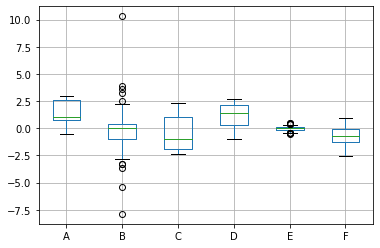

In [15]:
# Create boxplots for each column
data.boxplot()

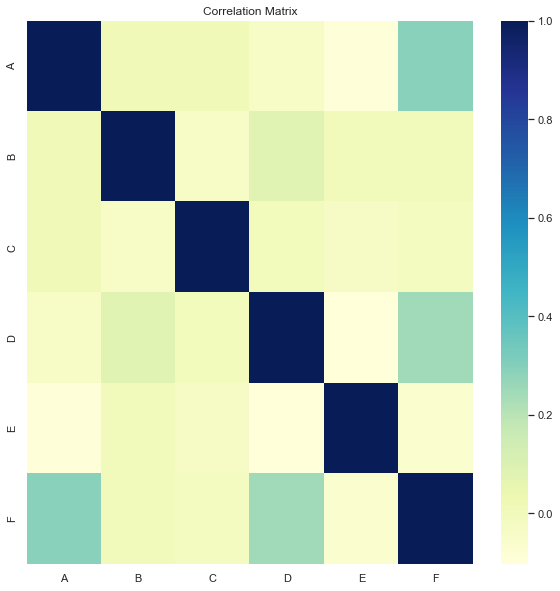

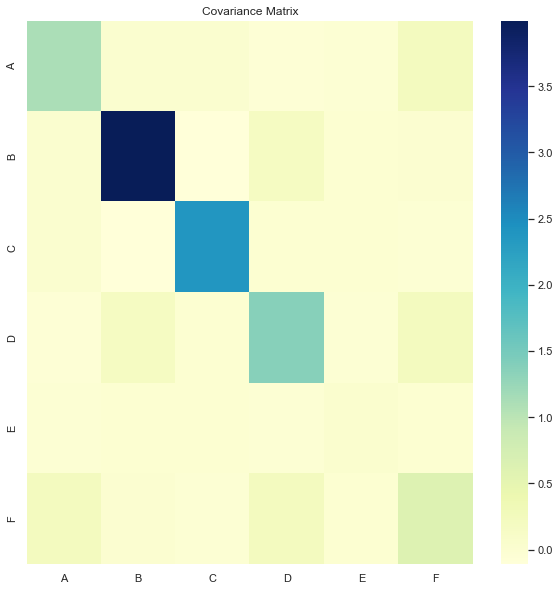

In [25]:
# plot correlation matrix
corr = data.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")
plt.show()

# plot covariance matrix
cov = data.cov()
plt.figure(figsize=(10,10))
plt.title('Covariance Matrix')
sns.heatmap(cov, xticklabels=cov.columns, yticklabels=cov.columns, cmap="YlGnBu")
plt.show()



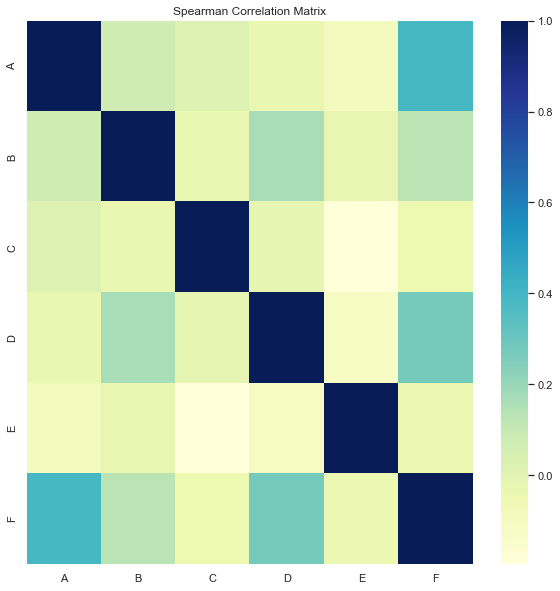

In [26]:
# plot spearman correlation matrix
corr = data.corr(method='spearman')
plt.figure(figsize=(10,10))
plt.title('Spearman Correlation Matrix')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")
plt.show()


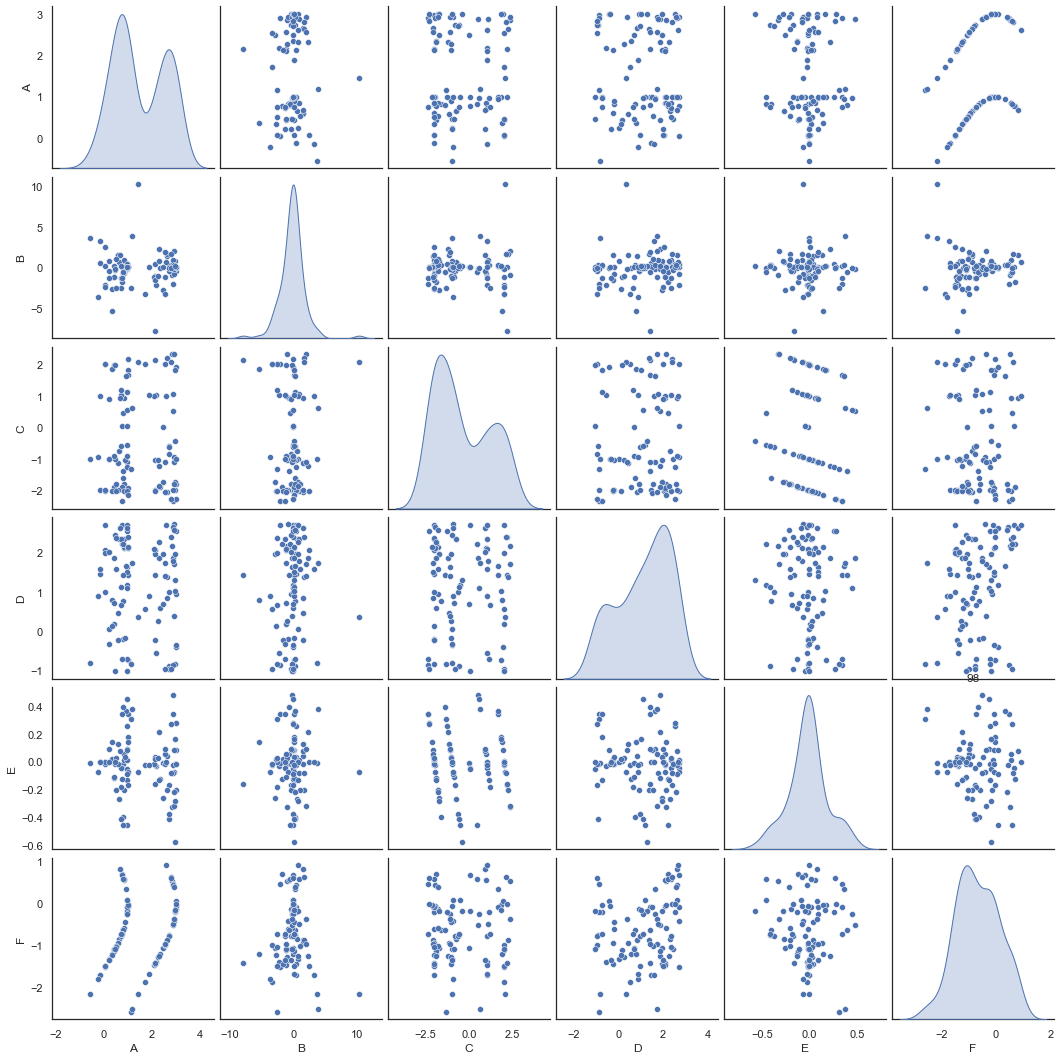

In [56]:
# Scatterplot matrix
sns.set(style="white")
sns.pairplot(data, kind="scatter", diag_kind="kde")
# save plot to file
plt.savefig('plots/1_scatter_matrix_observational.png')
plt.show()



array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>],
       [<AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'F'}>]], dtype=object)

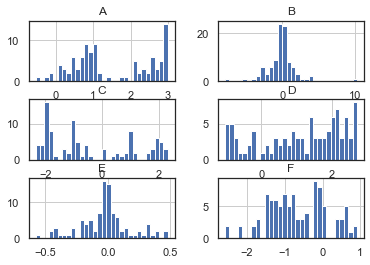

In [30]:
# plot histograms   
data.hist(bins=30)

C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='E', ylabel='Density'>

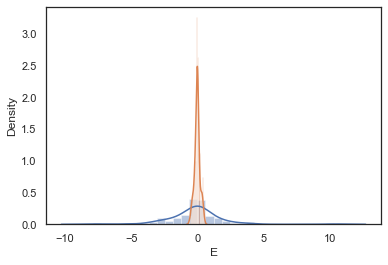

In [35]:
# test normal distribution
sns.distplot(data['B'])

# test normal distribution
sns.distplot(data['E'])

# # Create distribution plots
# sns.set(style="white")
# sns.pairplot(data, kind="reg", diag_kind="kde")
# plt.show()


## Intervention F=-0.5

In [43]:
data_F_int = load_as_df("data_50_F-0.5.csv")

In [44]:
data_F_int = data_F_int.drop(columns=['Unnamed: 0'])
data_F_int.describe()

,A,B,C,D,E,F
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,1.677583,-0.052146,-0.283903,0.934250,0.043903,-0.5
std,0.989743,0.835203,1.588279,1.213548,0.249203,0.0
min,0.877583,-2.753238,-2.604473,-1.531346,-0.621184,-0.5
25%,0.877583,-0.423682,-1.656281,-0.148312,-0.084529,-0.5
50%,0.877583,-0.023427,-0.787121,1.284512,0.006322,-0.5
75%,2.877583,0.323033,1.083240,1.961085,0.157712,-0.5
max,2.877583,2.063897,2.380939,2.563381,0.604473,-0.5


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


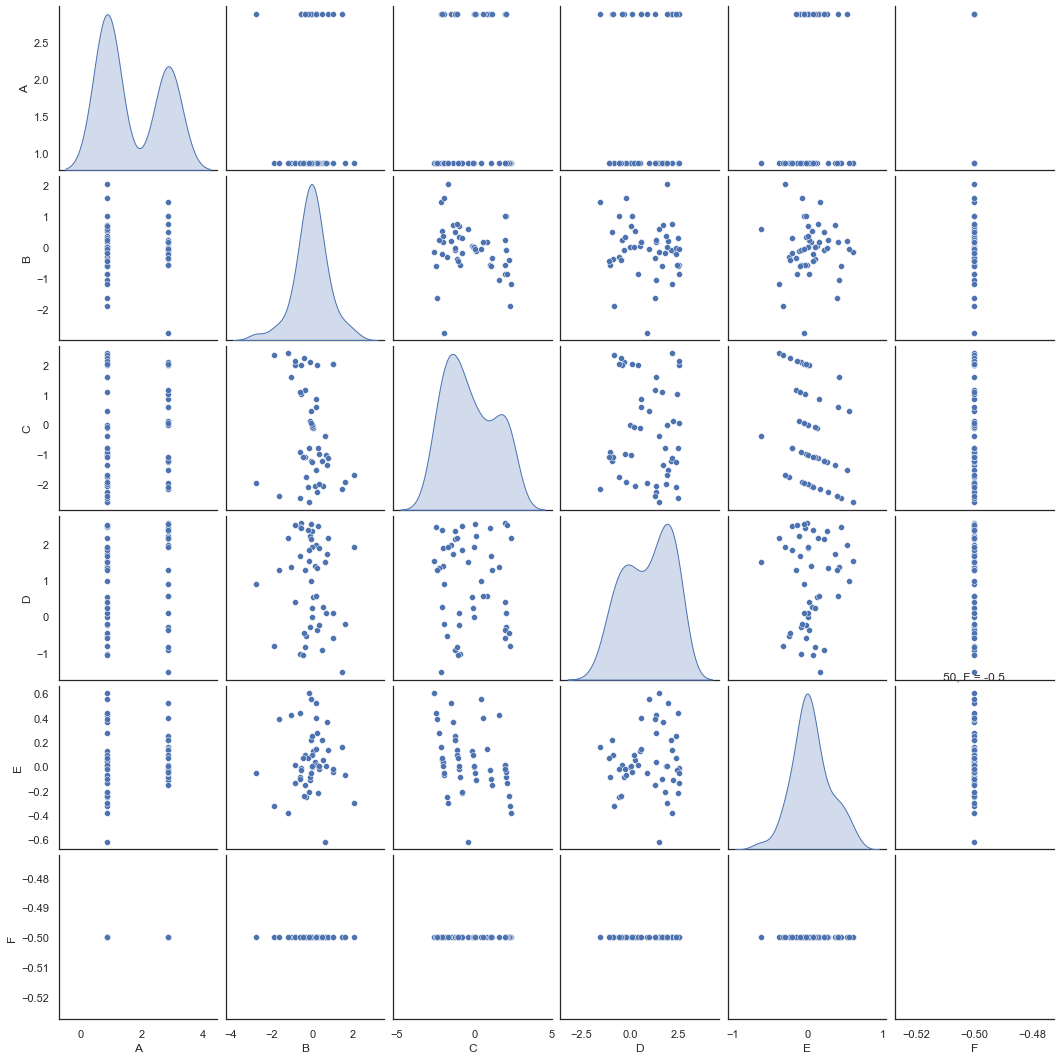

In [55]:
# Scatterplot matrix
sns.set(style="white")
sns.pairplot(data_F_int, kind="scatter", diag_kind="kde")
# save plot to file
plt.savefig('plots/2_scatter_matrix_F-0.5.png')
plt.show()


array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>],
       [<AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'F'}>]], dtype=object)

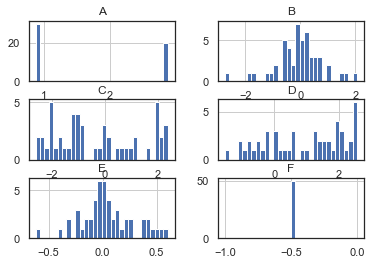

In [47]:
# plot histograms
data_F_int.hist(bins=30)